<a href="https://colab.research.google.com/github/Nacho0/Calculo/blob/main/Gradiante-Conjugado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se sabe que el metodo de la gradiente conjugada es uno de los métodos iterativos más utilizados en la resolución de sistemas de ecuaciones lineales y/o minimizar funciones cuadráticas convexas 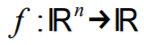; este es un metodo de descenso de gradiente, es efectivo para todos los sistemas con la forma Ax = b donde x es un vector desconocido y b es un vector que si se conoce, para A (matriz) se debe tener en cuenta que esta debe de ser cuadrada,simétrica y positiva definida (también puede considerarse si es positiva e indefinida).

In [ ]:
import numpy as np
A = np.matrix([[3.0, 2.0], [2.0, 6.0]])
b = np.matrix([[2.0], [-8.0]])  
c = 0.0

x = np.matrix([[-2.0],[-2.0]])
steps = [(-2.0, -2.0)]
i = 0
imax = 10000
eps = 0.01
alpha = 0.12  
r = b - A * x
delta = r.T * r
delta0 = delta
while i < imax and delta > eps**2 * delta0:
    x = x + alpha * r
    steps.append((x[0,0], x[1,0]))  
    r = b - A * x
    delta = r.T * r
    i += 1
print(r)

[[ 0.10432391]
 [-0.05216196]]


In [ ]:
def f(x, A, b, c):
    return float(0.5 * x.T * A * x - b.T * x + c)

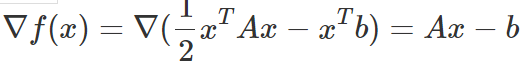

Por medio de la formula anterior calculamos la gradiente de la función, haciendo una minimización por tanto Ax = b la igualamos a 0, es decir, buscamos resolver un sistema de ecuaciones lineales.

El **error** un vector que indica qué tan lejos estamos de la solución, en la siguiente linea se muestra la formula que lo representa

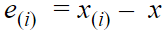

El **residual** indica qué tan lejos estamos son del valor correcto de b, la forma de este se ve en la siquiente línea.

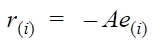

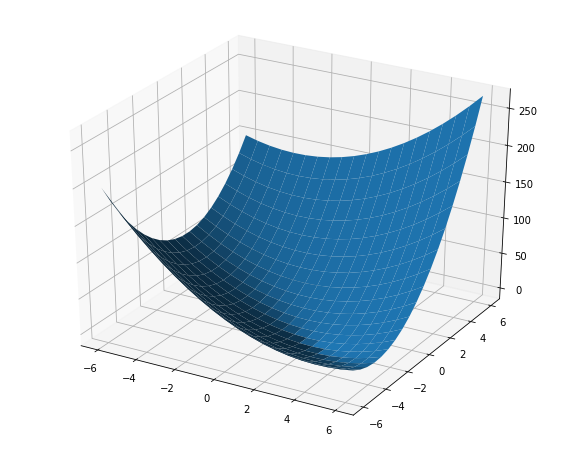

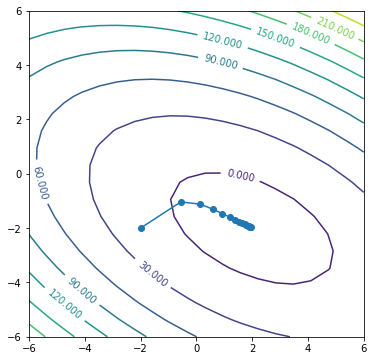

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import itertools
def f(x, A, b, c):
    return float(0.5 * x.T * A * x - b.T * x + c)

def contoursteps(x1, x2, zs, steps=None):
    fig = plt.figure(figsize=(6,6))
    cp = plt.contour(x1, x2, zs, 10)
    plt.clabel(cp, inline=1, fontsize=10)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:,0], steps[:,1], '-o')
    fig.show()
def bowl(A, b, c):
    fig = plt.figure(figsize=(10,8))
    qf = fig.gca(projection='3d')
    size = 20
    x1 = list(np.linspace(-6, 6, size))
    x2 = list(np.linspace(-6, 6, size))
    x1, x2 = np.meshgrid(x1, x2)
    zs = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]], [x2[i,j]]])
            zs[i,j] = f(x, A, b, c)
    qf.plot_surface(x1, x2, zs, rstride=1, cstride=1, linewidth=0)
    fig.show()
    return x1, x2, zs
x1, x2, zs = bowl(A, b, c)
contoursteps(x1, x2, zs, steps)